# Final Project
## Neural network: Prediction on bike sharing demand

In [1]:
# Import

import folium
from folium.plugins import MarkerCluster

# data set
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

# LSTM
import tensorflow as tf
import keras
from tensorflow.keras import layers
from sklearn import metrics
%matplotlib inline

### Importing the merged dataset

In [2]:
#dataset = pd.read_csv('Joint_dataframe.csv')

dataset = pd.read_csv(
    'April_to_June_3_months.csv',
    parse_dates=['timestamp'],
    index_col="timestamp"
)

# exclude timestamp column
#dataset = dataset.loc[:, dataset.columns!='timestamp']

In [3]:
dataset = dataset.drop(["index",'is_holiday','is_weekend'], axis = 1)
dataset = dataset.dropna(axis=0, how='any')
dataset

,In,Out,Station Id,Total,avg_temp,avg_temp_feel,avg_humidity,avg_windSpeed,date,longitude,latitude
timestamp,,,,,,,,,,,
2016-04-01,17,39,2,-22.0,8.520833,7.895833,66.5000,11.166667,1.0,-0.197574,51.4996
2016-04-01,42,24,3,18.0,8.520833,7.895833,66.5000,11.166667,1.0,-0.084606,51.5213
2016-04-01,51,30,4,21.0,8.520833,7.895833,66.5000,11.166667,1.0,-0.120974,51.5301
2016-04-01,44,71,5,-27.0,8.520833,7.895833,66.5000,11.166667,1.0,-0.156876,51.4931
2016-04-01,48,38,6,10.0,8.520833,7.895833,66.5000,11.166667,1.0,-0.144229,51.5181
...,...,...,...,...,...,...,...,...,...,...,...
2016-06-30,1,109,167,-108.0,17.250000,17.250000,74.0625,18.416667,30.0,-0.147624,51.4940
2016-06-30,3,17,168,-14.0,17.250000,17.250000,74.0625,18.416667,30.0,-0.195456,51.5004
2016-06-30,1,30,169,-29.0,17.250000,17.250000,74.0625,18.416667,30.0,-0.165164,51.5147


In [4]:
location = pd.read_csv("Cycle hire docking stations.csv")

In [5]:
#dataset.to_csv (r'C:Desktop\dataframe.csv', index = False, header=True)

## Plotting

In [6]:
def plot_graph(y_train, y_test_org, y_pred, i):
    ## Print heading
    plt.title( 'Station Id: %d' % (i))

    plt.plot(np.arange(0, len(y_train)), y_train, color='green', label="History")
    plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_org, color='blue', marker='.', label="Actual")
    plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, color='red', marker='.', label="Prediction")
    plt.ylabel('Bike Count')
    plt.xlabel('Time Step')
    plt.legend()
    plt.show();

## Error calculation

In [7]:
def get_MAE(y_test_org, y_pred):
    MAE = metrics.mean_absolute_error(y_test_org, y_pred)
    return MAE

In [8]:
def get_MSE(y_test_org, y_pred):
    MSE = metrics.mean_squared_error(y_test_org, y_pred)
    return MSE

In [9]:
def get_RMSE(y_test_org, y_pred):
    RMSE = np.sqrt(metrics.mean_squared_error(y_test_org, y_pred))
    return RMSE

In [10]:
def get_RMAE(y_test_org, y_pred):
    RMAE = np.sqrt(metrics.mean_absolute_error(y_test_org, y_pred))
    return RMAE

In [11]:
def print_error_calculation(y_test_org, y_pred):

    print('MAE:', get_MAE(y_test_org, y_pred))
    print('MSE:', get_MSE(y_test_org, y_pred))
    print('RMSE:', get_RMSE(y_test_org, y_pred))
    print('RMAE:', get_RMAE(y_test_org, y_pred))

### Datasets for each stations

In [12]:
# Extract number of bikes leaving to the station
## for loop with 800 station
## put that info to 800 datasets

obj = dataset.groupby('Station Id')

In [13]:
obj.get_group(1)

,In,Out,Station Id,Total,avg_temp,avg_temp_feel,avg_humidity,avg_windSpeed,date,longitude,latitude
timestamp,,,,,,,,,,,
2016-04-02,13,22,1,-9.0,10.729167,9.458333,62.125000,14.833333,2.0,-0.109971,51.5292
2016-04-03,27,22,1,5.0,11.562500,11.041667,77.541667,11.312500,3.0,-0.109971,51.5292
2016-04-04,52,20,1,32.0,11.083333,10.500000,77.520833,13.583333,4.0,-0.109971,51.5292
2016-04-05,75,12,1,63.0,11.583333,10.916667,65.708333,14.916667,5.0,-0.109971,51.5292
2016-04-06,41,23,1,18.0,9.500000,7.208333,65.812500,26.437500,6.0,-0.109971,51.5292
...,...,...,...,...,...,...,...,...,...,...,...
2016-06-25,11,9,1,2.0,16.062500,16.062500,73.458333,13.562500,25.0,-0.109971,51.5292
2016-06-26,48,26,1,22.0,16.604167,16.604167,71.145833,19.270833,26.0,-0.109971,51.5292
2016-06-27,23,22,1,1.0,18.062500,18.062500,68.958333,16.041667,27.0,-0.109971,51.5292


In [14]:
# add datasets to list

df = []
dropped = [35,79,80,137,179,198,205,237,241,259,283,285,304,342,346,369,385,391,406,407,413,414,415,416,417,418,422,429,434,438,439,493,497,
           502,525,555,567,575,582,585,791,797,798,799,802]

#[35,79,80,179,198,205,237,259,283,285,342,369,385,413,414,415,416,417,418,422,429,434,438,439,493,497,
           #502,525,567,575,582,585,791,797,798,799,802]
    
for i in range(1, len(location['Station.Id'])):
    if i in dropped:
        continue
    df.append(obj.get_group(i))

## Neural network

2022-04-12 18:07:17.643398: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
4/4 [==============================] - 1s 4ms/step - loss: 0.9729 - accuracy: 0.0000e+00
Epoch 2/50
4/4 [==============================] - 0s 3ms/step - loss: 0.9727 - accuracy: 0.0000e+00
Epoch 3/50
4/4 [==============================] - 0s 3ms/step - loss: 0.9726 - accuracy: 0.0000e+00
Epoch 4/50
4/4 [==============================] - 0s 3ms/step - loss: 0.9725 - accuracy: 0.0000e+00
Epoch 5/50
4/4 [==============================] - 0s 3ms/step - loss: 0.9725 - accuracy: 0.0000e+00
Epoch 6/50
4/4 [==============================] - 0s 4ms/step - loss: 0.9725 - accuracy: 0.0000e+00
Epoch 7/50
4/4 [==============================] - 0s 3ms/step - loss: 0.9723 - accuracy: 0.0000e+00
Epoch 8/50
4/4 [==============================] - 0s 2ms/step - loss: 0.9724 - accuracy: 0.0000e+00
Epoch 9/50
4/4 [==============================] - 0s 2ms/step - loss: 0.9721 - accuracy: 0.0000e+00
Epoch 10/50
4/4 [==============================] - 0s 3ms/step - loss: 0.9721 - accuracy: 0.0000e+00

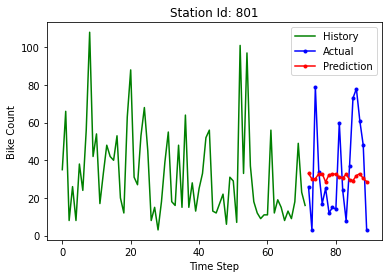

MAE: 21.5967468685574
MSE: 657.7718349462763
RMSE: 25.647062891221605
RMAE: 4.64723002105097


In [15]:
#X = df[i]['date'].values.reshape(-1,1) # reshape to make it two-dimentional
#y = df[i]['In'].values # Predict
    
X = df[1].values[:, 6:11]  #'avg_temp','avg_temp_feel','avg_humidity','avg_windSpeed','date'
y = df[1].values[:, 0:1] # 'In'
 
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler

PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)
 
# Generating the standardized values of X and y
X = PredictorScalerFit.transform(X)
y = TargetVarScalerFit.transform(y)
 
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### create ANN model ###

neural_network_model = keras.Sequential([
# Defining the Input layer and FIRST hidden layer, both are same!
layers.Dense(units=5, input_dim=5, kernel_initializer='normal', activation='relu'),
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
layers.Dense(units=5, kernel_initializer='normal', activation='tanh'),
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
layers.Dense(1, kernel_initializer='normal'),
])


# Fitting the ANN to the Training set
neural_network_model.compile(optimizer ='adam', loss ='mean_squared_error', metrics = ['accuracy'])
neural_network_model.fit(X_train, y_train, epochs = 50, batch_size = 20)

# Generating Predictions on testing data
pred = neural_network_model.predict(X_test)
y_pred = TargetVarScalerFit.inverse_transform(pred)
y_test_org = TargetVarScalerFit.inverse_transform(y_test)
y_train = TargetVarScalerFit.inverse_transform(y_train)
Test_Data = PredictorScalerFit.inverse_transform(X_test)
 
plot_graph(y_train, y_test_org, y_pred, i)
print_error_calculation(y_test_org,y_pred)

# for all stations

Epoch 1/50
5/5 [==============================] - 0s 2ms/step - loss: 0.9731 - accuracy: 0.0000e+00
Epoch 2/50
5/5 [==============================] - 0s 2ms/step - loss: 0.9727 - accuracy: 0.0000e+00
Epoch 3/50
5/5 [==============================] - 0s 2ms/step - loss: 0.9726 - accuracy: 0.0000e+00
Epoch 4/50
5/5 [==============================] - 0s 2ms/step - loss: 0.9726 - accuracy: 0.0000e+00
Epoch 5/50
5/5 [==============================] - 0s 2ms/step - loss: 0.9725 - accuracy: 0.0000e+00
Epoch 6/50
5/5 [==============================] - 0s 3ms/step - loss: 0.9725 - accuracy: 0.0000e+00
Epoch 7/50
5/5 [==============================] - 0s 2ms/step - loss: 0.9724 - accuracy: 0.0000e+00
Epoch 8/50
5/5 [==============================] - 0s 3ms/step - loss: 0.9723 - accuracy: 0.0000e+00
Epoch 9/50
5/5 [==============================] - 0s 3ms/step - loss: 0.9722 - accuracy: 0.0000e+00
Epoch 10/50
5/5 [==============================] - 0s 3ms/step - loss: 0.9720 - accuracy: 0.0000e+00

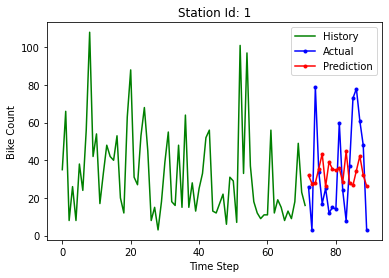

MAE: 22.263348897298176
MSE: 706.7550474574338
RMSE: 26.58486500732012
RMAE: 4.718405334146079
Epoch 1/50
5/5 [==============================] - 0s 2ms/step - loss: 1.1723 - accuracy: 0.0000e+00
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 1.1719 - accuracy: 0.0000e+00
Epoch 3/50
5/5 [==============================] - 0s 2ms/step - loss: 1.1718 - accuracy: 0.0000e+00
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 1.1715 - accuracy: 0.0000e+00
Epoch 5/50
5/5 [==============================] - 0s 2ms/step - loss: 1.1713 - accuracy: 0.0000e+00
Epoch 6/50
5/5 [==============================] - 0s 2ms/step - loss: 1.1711 - accuracy: 0.0000e+00
Epoch 7/50
5/5 [==============================] - 0s 2ms/step - loss: 1.1711 - accuracy: 0.0000e+00
Epoch 8/50
5/5 [==============================] - 0s 2ms/step - loss: 1.1707 - accuracy: 0.0000e+00
Epoch 9/50
5/5 [==============================] - 0s 2ms/step - loss: 1.1703 - accuracy: 0.0000e+00
Epoch

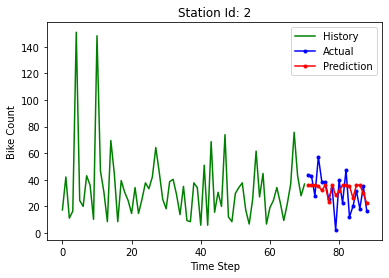

MAE: 9.971856560726799
MSE: 152.18178391240727
RMSE: 12.336198114184421
RMAE: 3.157824656425179
Epoch 1/50
5/5 [==============================] - 0s 1ms/step - loss: 0.7638 - accuracy: 0.0000e+00
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.7630 - accuracy: 0.0000e+00
Epoch 3/50
5/5 [==============================] - 0s 2ms/step - loss: 0.7625 - accuracy: 0.0000e+00
Epoch 4/50
5/5 [==============================] - 0s 2ms/step - loss: 0.7621 - accuracy: 0.0000e+00
Epoch 5/50
5/5 [==============================] - 0s 2ms/step - loss: 0.7618 - accuracy: 0.0000e+00
Epoch 6/50
5/5 [==============================] - 0s 2ms/step - loss: 0.7614 - accuracy: 0.0000e+00
Epoch 7/50
5/5 [==============================] - 0s 2ms/step - loss: 0.7609 - accuracy: 0.0000e+00
Epoch 8/50
5/5 [==============================] - 0s 2ms/step - loss: 0.7606 - accuracy: 0.0000e+00
Epoch 9/50
5/5 [==============================] - 0s 2ms/step - loss: 0.7602 - accuracy: 0.0000e+00
Epoc

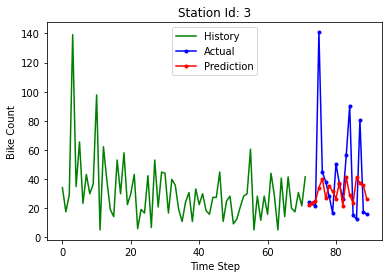

MAE: 20.30133139491782
MSE: 1089.497374331422
RMSE: 33.00753511444655
RMAE: 4.505699878478128
Epoch 1/50
5/5 [==============================] - 0s 2ms/step - loss: 1.1011 - accuracy: 0.0000e+00
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 1.1009 - accuracy: 0.0000e+00
Epoch 3/50
5/5 [==============================] - 0s 2ms/step - loss: 1.1009 - accuracy: 0.0000e+00
Epoch 4/50
5/5 [==============================] - 0s 2ms/step - loss: 1.1008 - accuracy: 0.0000e+00
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 1.1007 - accuracy: 0.0000e+00
Epoch 6/50
5/5 [==============================] - 0s 2ms/step - loss: 1.1007 - accuracy: 0.0000e+00
Epoch 7/50
5/5 [==============================] - 0s 2ms/step - loss: 1.1007 - accuracy: 0.0000e+00
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 1.1006 - accuracy: 0.0000e+00
Epoch 9/50
5/5 [==============================] - 0s 2ms/step - loss: 1.1005 - accuracy: 0.0000e+00
Epoch 

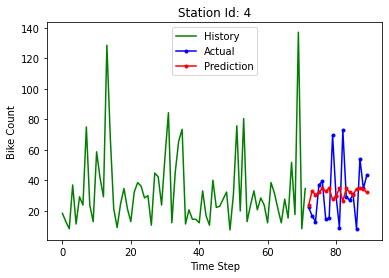

MAE: 14.755822599626141
MSE: 398.02689368509465
RMSE: 19.95061136118627
RMAE: 3.841330837044128
Epoch 1/50
5/5 [==============================] - 0s 2ms/step - loss: 1.0981 - accuracy: 0.0000e+00
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 1.0980 - accuracy: 0.0000e+00
Epoch 3/50
5/5 [==============================] - 0s 2ms/step - loss: 1.0979 - accuracy: 0.0000e+00
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 1.0977 - accuracy: 0.0000e+00
Epoch 5/50
5/5 [==============================] - 0s 2ms/step - loss: 1.0974 - accuracy: 0.0000e+00
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 1.0973 - accuracy: 0.0000e+00
Epoch 7/50
5/5 [==============================] - 0s 2ms/step - loss: 1.0971 - accuracy: 0.0000e+00
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 1.0969 - accuracy: 0.0000e+00
Epoch 9/50
5/5 [==============================] - 0s 2ms/step - loss: 1.0966 - accuracy: 0.0000e+00
Epoc

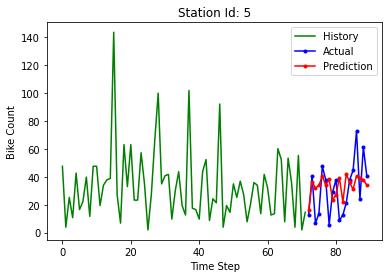

MAE: 14.727366277949484
MSE: 321.7032617768225
RMSE: 17.93608825181295
RMAE: 3.837625083036315
Epoch 1/50
5/5 [==============================] - 0s 2ms/step - loss: 1.1965 - accuracy: 0.0000e+00
Epoch 2/50
5/5 [==============================] - 0s 2ms/step - loss: 1.1964 - accuracy: 0.0000e+00
Epoch 3/50
5/5 [==============================] - 0s 2ms/step - loss: 1.1961 - accuracy: 0.0000e+00
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 1.1958 - accuracy: 0.0000e+00
Epoch 5/50
5/5 [==============================] - 0s 2ms/step - loss: 1.1955 - accuracy: 0.0000e+00
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 1.1956 - accuracy: 0.0000e+00
Epoch 7/50
5/5 [==============================] - 0s 2ms/step - loss: 1.1950 - accuracy: 0.0000e+00
Epoch 8/50
5/5 [==============================] - 0s 2ms/step - loss: 1.1946 - accuracy: 0.0000e+00
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 1.1941 - accuracy: 0.0000e+00
Epoch

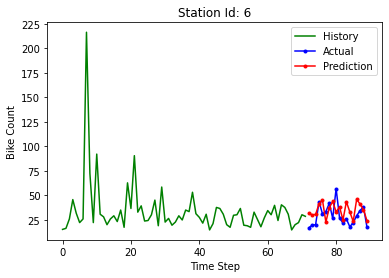

MAE: 10.514454857100207
MSE: 149.782769635714
RMSE: 12.23857710829629
RMAE: 3.242600014972585
Epoch 1/50
5/5 [==============================] - 0s 1ms/step - loss: 1.0098 - accuracy: 0.0000e+00
Epoch 2/50
5/5 [==============================] - 0s 2ms/step - loss: 1.0097 - accuracy: 0.0000e+00
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 1.0095 - accuracy: 0.0000e+00
Epoch 4/50
5/5 [==============================] - 0s 2ms/step - loss: 1.0095 - accuracy: 0.0000e+00
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 1.0094 - accuracy: 0.0000e+00
Epoch 6/50
5/5 [==============================] - 0s 2ms/step - loss: 1.0093 - accuracy: 0.0000e+00
Epoch 7/50
5/5 [==============================] - 0s 2ms/step - loss: 1.0092 - accuracy: 0.0000e+00
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 1.0090 - accuracy: 0.0000e+00
Epoch 9/50
5/5 [==============================] - 0s 2ms/step - loss: 1.0089 - accuracy: 0.0000e+00
Epoch 

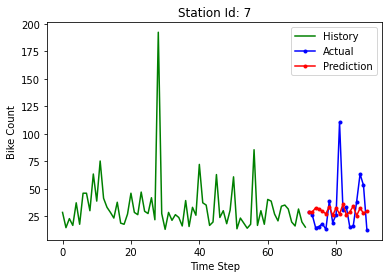

MAE: 16.300928962300652
MSE: 592.4388329722522
RMSE: 24.340066412650813
RMAE: 4.037440892731515
Epoch 1/50
5/5 [==============================] - 0s 1ms/step - loss: 0.3841 - accuracy: 0.0000e+00
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.3825 - accuracy: 0.0000e+00
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 0.3808 - accuracy: 0.0000e+00
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 0.3796 - accuracy: 0.0000e+00
Epoch 5/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3787 - accuracy: 0.0000e+00
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 0.3771 - accuracy: 0.0000e+00
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 0.3763 - accuracy: 0.0000e+00
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 0.3748 - accuracy: 0.0000e+00
Epoch 9/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3739 - accuracy: 0.0000e+00
Epoc

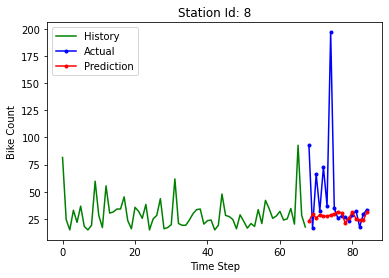

MAE: 23.262276940358582
MSE: 2191.4614555592702
RMSE: 46.81304791998989
RMAE: 4.823098271895212
Epoch 1/50
5/5 [==============================] - 0s 2ms/step - loss: 1.1043 - accuracy: 0.0000e+00
Epoch 2/50
5/5 [==============================] - 0s 2ms/step - loss: 1.1044 - accuracy: 0.0000e+00
Epoch 3/50
5/5 [==============================] - 0s 2ms/step - loss: 1.1039 - accuracy: 0.0000e+00
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 1.1040 - accuracy: 0.0000e+00
Epoch 5/50
5/5 [==============================] - 0s 2ms/step - loss: 1.1037 - accuracy: 0.0000e+00
Epoch 6/50
5/5 [==============================] - 0s 2ms/step - loss: 1.1036 - accuracy: 0.0000e+00
Epoch 7/50
5/5 [==============================] - 0s 2ms/step - loss: 1.1035 - accuracy: 0.0000e+00
Epoch 8/50
5/5 [==============================] - 0s 2ms/step - loss: 1.1037 - accuracy: 0.0000e+00
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 1.1035 - accuracy: 0.0000e+00
Epoc

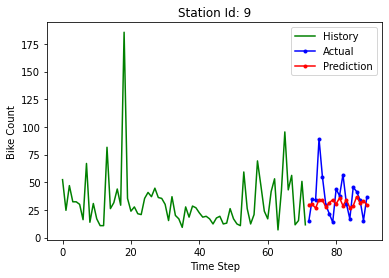

MAE: 13.343229433993072
MSE: 335.56844286738317
RMSE: 18.318527311642253
RMAE: 3.6528385447475054

Error Calculation
Average MAE: 14.544061592427093
Average MSE: 593.7415862197798
Average RMSE: 21.15255166015295
Average RMAE: 3.581686351347664


In [16]:
totalMAE = 0
totalMSE = 0
totalRMAE = 0
totalRMSE = 0

np.random.seed(7)

#no_station = len(location['Station.Id'])
no_station = 10
for i in range(1, no_station):
    
    X = df[i].values[:, 6:11]  #'avg_temp','avg_temp_feel','avg_humidity','avg_windSpeed','date'
    y = df[i].values[:, 0:1] # 'In'
 
    ### Sandardization of data ###
    from sklearn.preprocessing import StandardScaler

    PredictorScaler = StandardScaler()
    TargetVarScaler = StandardScaler()

    # Generating the standardized values of X and y
    X = PredictorScaler.fit(X).transform(X)
    y = TargetVarScaler.fit(y).transform(y)
 
    # Split the data into training and testing set
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    ### create ANN model ###

    neural_network_model = keras.Sequential([
    layers.Dense(units=5, input_dim=5, kernel_initializer='normal', activation='relu'),
    layers.Dense(units=5, kernel_initializer='normal', activation='tanh'),
    layers.Dense(1, kernel_initializer='normal'),
    ])

    # Fitting the ANN to the Training set
    neural_network_model.compile(optimizer ='adam', loss ='mean_squared_error', metrics = ['accuracy'])
    neural_network_model.fit(X_train, y_train, batch_size = 15,  epochs = 50)

    pred = neural_network_model.predict(X_test)
    y_pred = TargetVarScalerFit.inverse_transform(pred)
    y_test_org = TargetVarScalerFit.inverse_transform(y_test)
    y_train = TargetVarScalerFit.inverse_transform(y_train)
    Test_Data = PredictorScalerFit.inverse_transform(X_test)
 
    plot_graph(y_train, y_test_org, y_pred, i)
    print_error_calculation(y_test_org,y_pred)

    totalMAE += get_MAE(y_test_org,y_pred)
    totalMSE += get_MSE(y_test_org,y_pred)
    totalRMAE += get_RMSE(y_test_org,y_pred)
    totalRMSE += get_RMAE(y_test_org,y_pred)

print('')
print('Error Calculation')  
print('Average MAE:', totalMAE / no_station)
print('Average MSE:', totalMSE / no_station)
print('Average RMSE:', totalRMAE / no_station)
print('Average RMAE:', totalRMSE / no_station)
    

## advanced

In [17]:
# Defining a function to find the best parameters for ANN
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list = [5, 10, 15, 20]
    epoch_list = [5, 10, 50, 100]
    
    import pandas as pd
    SearchResultsData = pd.DataFrame(columns=['TrialNumber', 'batch_size', 'epochs', 'Accuracy'])
    
    # initializing the trials
    TrialNumber = 0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber += 1
            # create ANN model
            test_model = keras.Sequential([
            layers.Dense(units = 5, input_dim = X_train.shape[1], kernel_initializer = 'normal', activation = 'relu'),
            layers.Dense(units =5 , kernel_initializer = 'normal', activation = 'relu'),
            layers.Dense(1, kernel_initializer = 'normal'),
            ])

            # Compiling the model
            test_model.compile(loss='mean_squared_error', optimizer='adam')

            # Fitting the ANN to the Training set
            test_model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)
            MAPE = np.mean(100 * (np.abs(y_test - test_model.predict(X_test)) / y_test))
            
            # printing the results of the current iteration
            #print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData = SearchResultsData.append(pd.DataFrame(data = [[TrialNumber, batch_size_trial, epochs_trial, 100-MAPE]],
                                                                      columns = ['TrialNumber', 'batch_size', 'epochs', 'Accuracy'] ))
    return SearchResultsData

In [18]:
result_df = FunctionFindBestParams(X_train, y_train, X_test, y_test)
result_df

,TrialNumber,batch_size,epochs,Accuracy
0,1,5,5,105.424969
0,2,5,10,70.110284
0,3,5,50,-6836.365319
0,4,5,100,-8161.435084
0,5,10,5,99.133219
0,6,10,10,107.793855
0,7,10,50,-925.358596
0,8,10,100,-7507.183447
0,9,15,5,95.878416
0,10,15,10,106.121164


<AxesSubplot:xlabel='batch_size'>

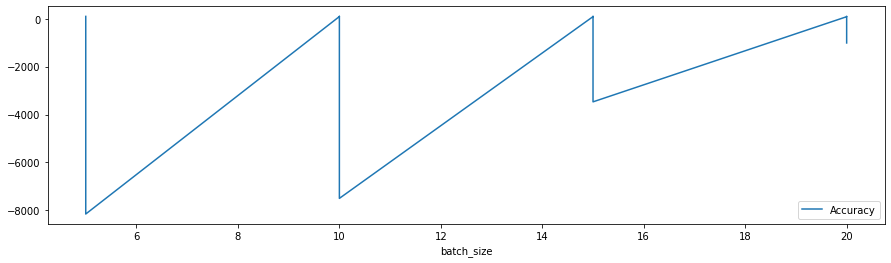

In [19]:
%matplotlib inline
result_df.plot(x='batch_size', y='Accuracy', figsize=(15,4), kind='line')

# parameters 
# e.g. 15-50
# 15 - batch size, 50 - epochs

In [20]:
return_df = result_df.loc[result_df['Accuracy'] == result_df['Accuracy'].max()]
print(return_df['batch_size'][0], return_df['epochs'][0])

10 10


Epoch 1/50
5/5 [==============================] - 0s 2ms/step - loss: 0.9729 - accuracy: 0.0000e+00
Epoch 2/50
5/5 [==============================] - 0s 2ms/step - loss: 0.9726 - accuracy: 0.0000e+00
Epoch 3/50
5/5 [==============================] - 0s 2ms/step - loss: 0.9725 - accuracy: 0.0000e+00
Epoch 4/50
5/5 [==============================] - 0s 2ms/step - loss: 0.9723 - accuracy: 0.0000e+00
Epoch 5/50
5/5 [==============================] - 0s 3ms/step - loss: 0.9723 - accuracy: 0.0000e+00
Epoch 6/50
5/5 [==============================] - 0s 3ms/step - loss: 0.9720 - accuracy: 0.0000e+00
Epoch 7/50
5/5 [==============================] - 0s 3ms/step - loss: 0.9718 - accuracy: 0.0000e+00
Epoch 8/50
5/5 [==============================] - 0s 3ms/step - loss: 0.9715 - accuracy: 0.0000e+00
Epoch 9/50
5/5 [==============================] - 0s 3ms/step - loss: 0.9712 - accuracy: 0.0000e+00
Epoch 10/50
5/5 [==============================] - 0s 3ms/step - loss: 0.9707 - accuracy: 0.0000e+00

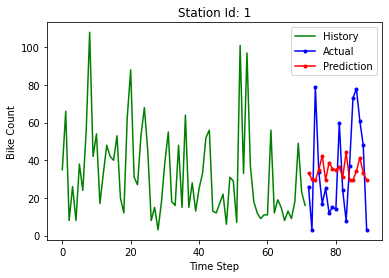

MAE: 22.504016452365452
MSE: 697.7762111991631
RMSE: 26.415454022203804
RMAE: 4.7438398426133075
Epoch 1/50
8/8 [==============================] - 0s 1ms/step - loss: 1.1723 - accuracy: 0.0000e+00
Epoch 2/50
8/8 [==============================] - 0s 1ms/step - loss: 1.1719 - accuracy: 0.0000e+00
Epoch 3/50
8/8 [==============================] - 0s 1ms/step - loss: 1.1717 - accuracy: 0.0000e+00
Epoch 4/50
8/8 [==============================] - 0s 1ms/step - loss: 1.1712 - accuracy: 0.0000e+00
Epoch 5/50
8/8 [==============================] - 0s 1ms/step - loss: 1.1710 - accuracy: 0.0000e+00
Epoch 6/50
8/8 [==============================] - 0s 1ms/step - loss: 1.1704 - accuracy: 0.0000e+00
Epoch 7/50
8/8 [==============================] - 0s 2ms/step - loss: 1.1701 - accuracy: 0.0000e+00
Epoch 8/50
8/8 [==============================] - 0s 2ms/step - loss: 1.1696 - accuracy: 0.0000e+00
Epoch 9/50
8/8 [==============================] - 0s 2ms/step - loss: 1.1690 - accuracy: 0.0000e+00
Epo

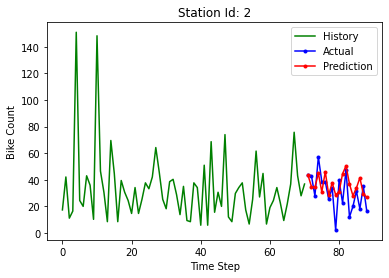

MAE: 10.177790106961389
MSE: 167.24270920285142
RMSE: 12.932235274802705
RMAE: 3.19026489604882
Epoch 1/5
8/8 [==============================] - 0s 2ms/step - loss: 0.7638 - accuracy: 0.0000e+00
Epoch 2/5
8/8 [==============================] - 0s 1ms/step - loss: 0.7623 - accuracy: 0.0000e+00
Epoch 3/5
8/8 [==============================] - 0s 1ms/step - loss: 0.7616 - accuracy: 0.0000e+00
Epoch 4/5
8/8 [==============================] - 0s 1ms/step - loss: 0.7608 - accuracy: 0.0000e+00
Epoch 5/5
8/8 [==============================] - 0s 1ms/step - loss: 0.7598 - accuracy: 0.0000e+00


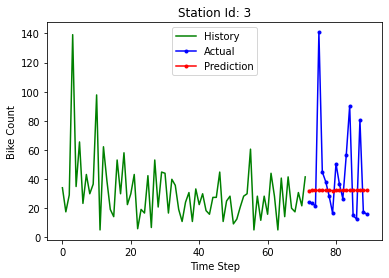

MAE: 22.272080835738638
MSE: 1130.8215263100628
RMSE: 33.62768987471579
RMAE: 4.719330549531219
Epoch 1/100
15/15 [==============================] - 0s 2ms/step - loss: 1.1016 - accuracy: 0.0000e+00
Epoch 2/100
15/15 [==============================] - 0s 2ms/step - loss: 1.1012 - accuracy: 0.0000e+00
Epoch 3/100
15/15 [==============================] - 0s 1ms/step - loss: 1.1008 - accuracy: 0.0000e+00
Epoch 4/100
15/15 [==============================] - 0s 2ms/step - loss: 1.1008 - accuracy: 0.0000e+00
Epoch 5/100
15/15 [==============================] - 0s 2ms/step - loss: 1.1007 - accuracy: 0.0000e+00
Epoch 6/100
15/15 [==============================] - 0s 2ms/step - loss: 1.1006 - accuracy: 0.0000e+00
Epoch 7/100
15/15 [==============================] - 0s 2ms/step - loss: 1.1004 - accuracy: 0.0000e+00
Epoch 8/100
15/15 [==============================] - 0s 2ms/step - loss: 1.1001 - accuracy: 0.0000e+00
Epoch 9/100
15/15 [==============================] - 0s 2ms/step - loss: 1.1002 

15/15 [==============================] - 0s 1ms/step - loss: 1.0104 - accuracy: 0.0000e+00
Epoch 79/100
15/15 [==============================] - 0s 1ms/step - loss: 1.0126 - accuracy: 0.0000e+00
Epoch 80/100
15/15 [==============================] - 0s 1ms/step - loss: 1.0105 - accuracy: 0.0000e+00
Epoch 81/100
15/15 [==============================] - 0s 1ms/step - loss: 1.0095 - accuracy: 0.0000e+00
Epoch 82/100
15/15 [==============================] - 0s 1ms/step - loss: 1.0102 - accuracy: 0.0000e+00
Epoch 83/100
15/15 [==============================] - 0s 1ms/step - loss: 1.0124 - accuracy: 0.0000e+00
Epoch 84/100
15/15 [==============================] - 0s 1ms/step - loss: 1.0102 - accuracy: 0.0000e+00
Epoch 85/100
15/15 [==============================] - 0s 1ms/step - loss: 1.0093 - accuracy: 0.0000e+00
Epoch 86/100
15/15 [==============================] - 0s 1ms/step - loss: 1.0095 - accuracy: 0.0000e+00
Epoch 87/100
15/15 [==============================] - 0s 1ms/step - loss: 1.0

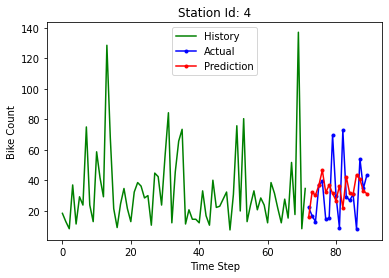

MAE: 15.84841992575948
MSE: 442.53088149980545
RMSE: 21.03641798167657
RMAE: 3.9810074008672074
Epoch 1/100
15/15 [==============================] - 0s 1ms/step - loss: 1.0986 - accuracy: 0.0000e+00
Epoch 2/100
15/15 [==============================] - 0s 1ms/step - loss: 1.0978 - accuracy: 0.0000e+00
Epoch 3/100
15/15 [==============================] - 0s 1ms/step - loss: 1.0976 - accuracy: 0.0000e+00
Epoch 4/100
15/15 [==============================] - 0s 1ms/step - loss: 1.0970 - accuracy: 0.0000e+00
Epoch 5/100
15/15 [==============================] - 0s 1ms/step - loss: 1.0966 - accuracy: 0.0000e+00
Epoch 6/100
15/15 [==============================] - 0s 2ms/step - loss: 1.0958 - accuracy: 0.0000e+00
Epoch 7/100
15/15 [==============================] - 0s 1ms/step - loss: 1.0945 - accuracy: 0.0000e+00
Epoch 8/100
15/15 [==============================] - 0s 1ms/step - loss: 1.0923 - accuracy: 0.0000e+00
Epoch 9/100
15/15 [==============================] - 0s 2ms/step - loss: 1.0898 

15/15 [==============================] - 0s 2ms/step - loss: 0.8549 - accuracy: 0.0000e+00
Epoch 79/100
15/15 [==============================] - 0s 2ms/step - loss: 0.8553 - accuracy: 0.0000e+00
Epoch 80/100
15/15 [==============================] - 0s 2ms/step - loss: 0.8543 - accuracy: 0.0000e+00
Epoch 81/100
15/15 [==============================] - 0s 2ms/step - loss: 0.8544 - accuracy: 0.0000e+00
Epoch 82/100
15/15 [==============================] - 0s 2ms/step - loss: 0.8552 - accuracy: 0.0000e+00
Epoch 83/100
15/15 [==============================] - 0s 2ms/step - loss: 0.8535 - accuracy: 0.0000e+00
Epoch 84/100
15/15 [==============================] - 0s 2ms/step - loss: 0.8537 - accuracy: 0.0000e+00
Epoch 85/100
15/15 [==============================] - 0s 2ms/step - loss: 0.8537 - accuracy: 0.0000e+00
Epoch 86/100
15/15 [==============================] - 0s 2ms/step - loss: 0.8552 - accuracy: 0.0000e+00
Epoch 87/100
15/15 [==============================] - 0s 2ms/step - loss: 0.8

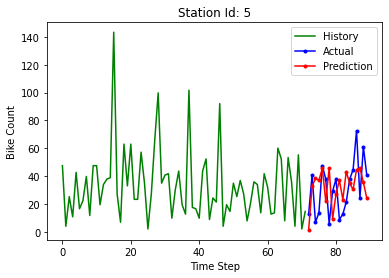

MAE: 18.451446055405803
MSE: 436.58145406762105
RMSE: 20.89453167859048
RMAE: 4.295514643835568
Epoch 1/50
4/4 [==============================] - 1s 2ms/step - loss: 1.1968 - accuracy: 0.0000e+00
Epoch 2/50
4/4 [==============================] - 0s 3ms/step - loss: 1.1964 - accuracy: 0.0000e+00
Epoch 3/50
4/4 [==============================] - 0s 3ms/step - loss: 1.1961 - accuracy: 0.0000e+00
Epoch 4/50
4/4 [==============================] - 0s 2ms/step - loss: 1.1960 - accuracy: 0.0000e+00
Epoch 5/50
4/4 [==============================] - 0s 2ms/step - loss: 1.1956 - accuracy: 0.0000e+00
Epoch 6/50
4/4 [==============================] - 0s 3ms/step - loss: 1.1954 - accuracy: 0.0000e+00
Epoch 7/50
4/4 [==============================] - 0s 3ms/step - loss: 1.1952 - accuracy: 0.0000e+00
Epoch 8/50
4/4 [==============================] - 0s 3ms/step - loss: 1.1949 - accuracy: 0.0000e+00
Epoch 9/50
4/4 [==============================] - 0s 3ms/step - loss: 1.1945 - accuracy: 0.0000e+00
Epoc

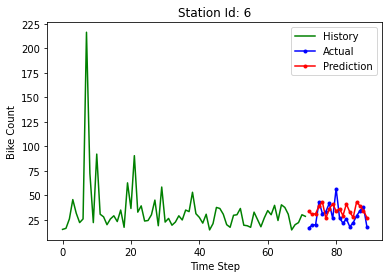

MAE: 10.537689224470812
MSE: 137.03229366081055
RMSE: 11.706079346254686
RMAE: 3.246180713464796
Epoch 1/10
15/15 [==============================] - 1s 2ms/step - loss: 1.0102 - accuracy: 0.0000e+00
Epoch 2/10
15/15 [==============================] - 0s 2ms/step - loss: 1.0098 - accuracy: 0.0000e+00
Epoch 3/10
15/15 [==============================] - 0s 2ms/step - loss: 1.0096 - accuracy: 0.0000e+00
Epoch 4/10
15/15 [==============================] - 0s 2ms/step - loss: 1.0096 - accuracy: 0.0000e+00
Epoch 5/10
15/15 [==============================] - 0s 2ms/step - loss: 1.0096 - accuracy: 0.0000e+00
Epoch 6/10
15/15 [==============================] - 0s 2ms/step - loss: 1.0095 - accuracy: 0.0000e+00
Epoch 7/10
15/15 [==============================] - 0s 2ms/step - loss: 1.0095 - accuracy: 0.0000e+00
Epoch 8/10
15/15 [==============================] - 0s 2ms/step - loss: 1.0091 - accuracy: 0.0000e+00
Epoch 9/10
15/15 [==============================] - 0s 2ms/step - loss: 1.0091 - accura

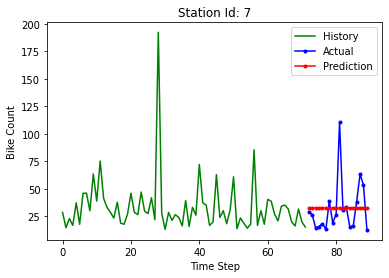

MAE: 16.43134503283231
MSE: 554.9508949512784
RMSE: 23.557395759108825
RMAE: 4.053559550917232
Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 0.3837 - accuracy: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 0.3824 - accuracy: 0.0000e+00
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 0.3813 - accuracy: 0.0000e+00
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 0.3803 - accuracy: 0.0000e+00
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 0.3788 - accuracy: 0.0000e+00
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 0.3777 - accuracy: 0.0000e+00
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 0.3762 - accuracy: 0.0000e+00
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 0.3748 - accuracy: 0.0000e+00
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 0.3737 - accuracy: 0.0000e

5/5 [==============================] - 0s 2ms/step - loss: 0.3182 - accuracy: 0.0000e+00
Epoch 81/100
5/5 [==============================] - 0s 2ms/step - loss: 0.3177 - accuracy: 0.0000e+00
Epoch 82/100
5/5 [==============================] - 0s 2ms/step - loss: 0.3175 - accuracy: 0.0000e+00
Epoch 83/100
5/5 [==============================] - 0s 2ms/step - loss: 0.3174 - accuracy: 0.0000e+00
Epoch 84/100
5/5 [==============================] - 0s 2ms/step - loss: 0.3172 - accuracy: 0.0000e+00
Epoch 85/100
5/5 [==============================] - 0s 2ms/step - loss: 0.3170 - accuracy: 0.0000e+00
Epoch 86/100
5/5 [==============================] - 0s 2ms/step - loss: 0.3166 - accuracy: 0.0000e+00
Epoch 87/100
5/5 [==============================] - 0s 2ms/step - loss: 0.3165 - accuracy: 0.0000e+00
Epoch 88/100
5/5 [==============================] - 0s 2ms/step - loss: 0.3164 - accuracy: 0.0000e+00
Epoch 89/100
5/5 [==============================] - 0s 2ms/step - loss: 0.3166 - accuracy: 0.00

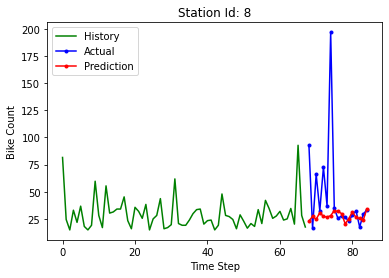

MAE: 22.934799317040582
MSE: 2208.557189621063
RMSE: 46.99528901518814
RMAE: 4.789029057861372
Epoch 1/50
15/15 [==============================] - 0s 2ms/step - loss: 1.1051 - accuracy: 0.0000e+00
Epoch 2/50
15/15 [==============================] - 0s 1ms/step - loss: 1.1044 - accuracy: 0.0000e+00
Epoch 3/50
15/15 [==============================] - 0s 2ms/step - loss: 1.1041 - accuracy: 0.0000e+00
Epoch 4/50
15/15 [==============================] - 0s 2ms/step - loss: 1.1040 - accuracy: 0.0000e+00
Epoch 5/50
15/15 [==============================] - 0s 2ms/step - loss: 1.1038 - accuracy: 0.0000e+00
Epoch 6/50
15/15 [==============================] - 0s 2ms/step - loss: 1.1039 - accuracy: 0.0000e+00
Epoch 7/50
15/15 [==============================] - 0s 2ms/step - loss: 1.1038 - accuracy: 0.0000e+00
Epoch 8/50
15/15 [==============================] - 0s 2ms/step - loss: 1.1033 - accuracy: 0.0000e+00
Epoch 9/50
15/15 [==============================] - 0s 2ms/step - loss: 1.1028 - accuracy

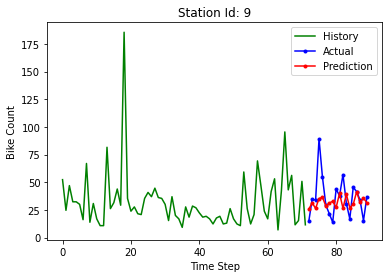

MAE: 13.030783188592235
MSE: 330.9291003925514
RMSE: 18.191456796874498
RMAE: 3.609817611541092

Error Calculation
Average MAE: 15.21883701391667
Average MSE: 610.6422260905207
Average RMSE: 21.53565497494155
Average RMAE: 3.6628544266680607


In [24]:
totalMAE = 0
totalMSE = 0
totalRMAE = 0
totalRMSE = 0

np.random.seed(7)

#no_station = len(location['Station.Id'])
no_station = 10
for i in range(1, no_station):
    
    X = df[i].values[:, 6:11]  #'avg_temp','avg_temp_feel','avg_humidity','avg_windSpeed','date'
    y = df[i].values[:, 0:1] # 'In'
 
    ### Sandardization of data ###
    from sklearn.preprocessing import StandardScaler

    PredictorScaler = StandardScaler()
    TargetVarScaler = StandardScaler()

    # Generating the standardized values of X and y
    X = PredictorScaler.fit(X).transform(X)
    y = TargetVarScaler.fit(y).transform(y)
 
    # Split the data into training and testing set
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    ### create ANN model ###

    neural_network_model = keras.Sequential([
    layers.Dense(units=5, input_dim=5, kernel_initializer='normal', activation='relu'),
    layers.Dense(units=5, kernel_initializer='normal', activation='tanh'),
    layers.Dense(1, kernel_initializer='normal'),
    ])

    # Fitting the ANN to the Training set
    neural_network_model.compile(optimizer ='adam', loss ='mean_squared_error', metrics = ['accuracy'])
    
    # find best parameters
    result_df = FunctionFindBestParams(X_train, y_train, X_test, y_test)
    return_df = result_df.loc[result_df['Accuracy'] == result_df['Accuracy'].max()]
    best_batch_size = int(return_df['batch_size'][0])
    best_epochs = int(return_df['epochs'][0])
    
    neural_network_model.fit(X_train, y_train, batch_size = best_batch_size,  epochs = best_epochs)

    pred = neural_network_model.predict(X_test)
    y_pred = TargetVarScalerFit.inverse_transform(pred)
    y_test_org = TargetVarScalerFit.inverse_transform(y_test)
    y_train = TargetVarScalerFit.inverse_transform(y_train)
    Test_Data = PredictorScalerFit.inverse_transform(X_test)
 
    plot_graph(y_train, y_test_org, y_pred, i)
    print_error_calculation(y_test_org,y_pred)

    totalMAE += get_MAE(y_test_org,y_pred)
    totalMSE += get_MSE(y_test_org,y_pred)
    totalRMAE += get_RMSE(y_test_org,y_pred)
    totalRMSE += get_RMAE(y_test_org,y_pred)

print('')
print('Error Calculation')  
print('Average MAE:', totalMAE / no_station)
print('Average MSE:', totalMSE / no_station)
print('Average RMSE:', totalRMAE / no_station)
print('Average RMAE:', totalRMSE / no_station)
    

## K fold

In [22]:
totalMAE = 0
totalMSE = 0
totalRMAE = 0
totalRMSE = 0

#no_station = len(location['Station.Id'])
no_station = 10
for i in range(1, no_station):
    
    X = df[i].values[:, 6:11]  #'avg_temp','avg_temp_feel','avg_humidity','avg_windSpeed','date'
    y = df[i].values[:, 0:1] # 'In'
 
    ### Sandardization of data ###
    from sklearn.preprocessing import StandardScaler

    PredictorScaler = StandardScaler()
    TargetVarScaler = StandardScaler()

    # Generating the standardized values of X and y
    X = PredictorScaler.fit(X).transform(X)
    y = TargetVarScaler.fit(y).transform(y)
 
    # Split the data into training and testing set
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # K fold
    from sklearn.model_selection import cross_val_score
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import KFold
    from sklearn.feature_selection import RFE
    
    # step-1: create a cross-validation scheme
    folds = KFold(n_splits = 5, shuffle = True, random_state = 100)                                           
    
    # step-2: specify range of hyperparameters to tune
    # range (1,6) : 'avg_temp','avg_temp_feel','avg_humidity','avg_windSpeed','date'
    hyper_params = [{'n_features_to_select': list(range(1, 6))}]              

    ### create ANN model ###

    neural_network_model = keras.Sequential([
    layers.Dense(units=5, input_dim=5, kernel_initializer='normal', activation='relu'),
    layers.Dense(units=5, kernel_initializer='normal', activation='tanh'),
    layers.Dense(1, kernel_initializer='normal'),
    ])

    # Fitting the ANN to the Training set
    neural_network_model.compile(optimizer ='adam', loss ='mean_squared_error', metrics = ['accuracy'])
    rfe = RFE(neural_network_model)       
    
    # 3.2 call GridSearchCV()
    model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)

    
    # find best parameters
    #result_df = FunctionFindBestParams(X_train, y_train, X_test, y_test)
    #return_df = result_df.loc[result_df['Accuracy'] == result_df['Accuracy'].max()]
    #best_batch_size = int(return_df['batch_size'][0])
    #best_epochs = int(return_df['epochs'][0])
    
    #model_cv.fit(X_train, y_train, batch_size = best_batch_size,  epochs = best_epochs)
    model_cv.fit(X_train, y_train, batch_size = 15,  epochs = 50)

    pred = model_cv.predict(X_test)
    y_pred = TargetVarScalerFit.inverse_transform(pred)
 
    y_test_org = TargetVarScalerFit.inverse_transform(y_test)
    Test_Data = PredictorScalerFit.inverse_transform(X_test)
 
    ## Print heading
    plt.title( 'Station Id: %d' % (i))
    
    plt.plot(np.arange(0, len(y_train)), y_test_org, color='green', label="History")
    plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_org, color='blue', marker='.', label="Actual")
    plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, color='red', marker='.', label="Prediction")
    plt.ylabel('Bike Count')
    plt.xlabel('Time Step')
    plt.legend()
    plt.show();

    ## Calculate error
    from sklearn import metrics
    MAE = metrics.mean_absolute_error(y_test_org, y_pred)
    MSE = metrics.mean_squared_error(y_test_org, y_pred)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test_org, y_pred))
    RMAE = np.sqrt(metrics.mean_absolute_error(y_test_org, y_pred))
    
    print('MAE:', MAE)
    print('MSE:', MSE)
    print('RMSE:', RMSE)
    print('RMAE:', RMAE)
    totalMAE += MAE
    totalMSE += MSE
    totalRMAE += RMSE
    totalRMSE += RMAE

print('')
print('Error Calculation')  
print('Average MAE:', totalMAE / no_station)
print('Average MSE:', totalMSE / no_station)
print('Average RMSE:', totalRMAE / no_station)
print('Average RMAE:', totalRMSE / no_station)

2022-04-12 18:10:00.293943: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ram://cdd88305-a341-4748-93ce-5fb556043175/assets
Fitting 5 folds for each of 5 candidates, totalling 25 fits
INFO:tensorflow:Assets written to: ram://bdc5f754-fefd-4f44-b455-9f68a7c5c150/assets
INFO:tensorflow:Assets written to: ram://22b22420-9d11-4343-b7dd-8297ed4fee06/assets
INFO:tensorflow:Assets written to: ram://34ffac99-5d79-4334-a902-7f10df726880/assets
INFO:tensorflow:Assets written to: ram://c4c9ba23-1441-4416-802c-4284a8f2c522/assets
INFO:tensorflow:Assets written to: ram://3312e543-eeb2-4c98-b29f-607be58b0c55/assets
INFO:tensorflow:Assets written to: ram://072750ed-ab09-42c0-b257-70028d0b1b43/assets
INFO:tensorflow:Assets written to: ram://e5b262f8-95e0-4b4d-a229-c4e50904a3e9/assets
INFO:tensorflow:Assets written to: ram://6f976de7-37c0-49ac-8330-a189594ae4c1/assets
INFO:tensorflow:Assets written to: ram://e2ed4008-fde0-44f9-93f3-e383f770bbf4/assets
INFO:tensorflow:Assets written to: ram://16deb847-fbd2-4e2d-84b3-c6cd7ce4b48b/assets
INFO:

/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/sklearn/feature_selection/_rfe.py", line 222, in fit
    return self._fit(X, y, **fit_params)
  File "/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/sklearn/feature_selection/_

INFO:tensorflow:Assets written to: ram://59c7560f-59ea-441a-9425-63823ceec0e6/assets
INFO:tensorflow:Assets written to: ram://20556d7d-4ea4-406a-9b90-81f06241999b/assets


TypeError: Cannot clone object '<keras.engine.sequential.Sequential object at 0x7fe6c24278b0>' (type <class 'keras.engine.sequential.Sequential'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.

- https://thinkingneuron.com/using-artificial-neural-networks-for-regression-in-python/